<a href="https://colab.research.google.com/github/NEELANATARAJAN/pytorch_deeplearning/blob/main/practices/03_pytorch_cv_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.6.0+cu124


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Automated car driving
2. Medical fields
3. Security cameras to detect intruders

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

When the model learns too much about the training data including noise and irrelevant details and performs poorly against validation data/new or unseen data, it means the model is overfitting for the given data.

Why it happens?
* Model is complex and so tailored to the training data.
* Insufficient data which is caused by model memorizing the data instead of generalized learning
* Training data has a lot of inconsistencies and noise that the model ends up learning that as a feature

How to detect?
* Performance Gap
* Learning curves (where training loss amounts to zero)
* Decision boundaries (very intricate boundaries)

How to avoid?
* Regularization - Techniques like L1 & L2, dropout
* Data Augmentation - having diversified data
* Simpler models
* Cross validations

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
print(train_data)
print(test_data)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 475kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.21MB/s]

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


## 6. Visualize at least 5 different samples of the MNIST training dataset.

37542
46067
46876
46414
10026
27335


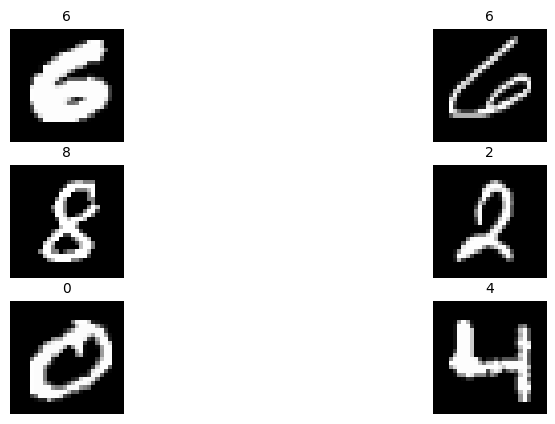

In [ ]:
import matplotlib.pyplot as plt

torch.manual_seed(42)
fig = plt.figure(figsize=(10,5))
rows, cols = 3, 2
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(label, fontsize=10)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
BATCH_SIZE = 32
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)


In [ ]:
train_features, train_labels = next(iter(train_data_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features)
print(train_labels)
# print(test_data_loader[0])

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
  

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

torch.Size([1, 28, 28]) 4


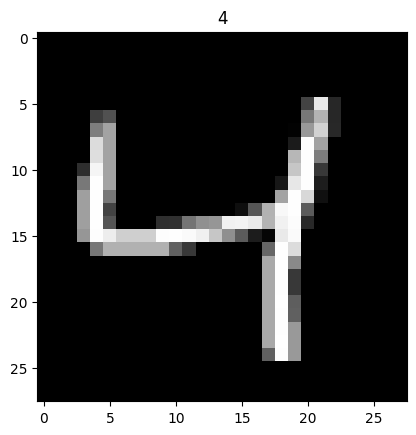

In [ ]:
img, label = train_data[2]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(label)
print(img.shape, label)

In [ ]:
len(train_data.classes)

10

In [ ]:
class MNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_blk_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_blk_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x:torch.Tensor):
      # print(x.shape)
      x = self.conv_blk_1(x)
      # print(x.shape)
      x = self.conv_blk_2(x)
      # print(x.shape)
      x = self.classifier(x)
      # print(x.shape)
      return x

model_2 = MNISTModelV2(input_shape=1,
                       hidden_units=10,
                       output_shape=len(train_data.classes))
model_2

MNISTModelV2(
  (conv_blk_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_blk_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:3f}")
  return total_time

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
from pathlib import Path
import requests

# Download helper functions if not exists
if Path("helper_functions.py").is_file():
  print("Helper functions file already exists")
else:
  print("Downloading helper functions file")
  with open("helper_functions.py","wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    f.write(request.content)


In [ ]:
from helper_functions import accuracy_fn
from tqdm.auto import tqdm

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_2.to(device)

train_start_time = timer()

EPOCHS = 3

for epoch in tqdm(range(EPOCHS), desc="Training and Testing..."):
  # Training the model
  model_2.train()
  train_loss = 0
  train_accuracy = 0
  for batch, (X, y) in enumerate(train_data_loader):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_2(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backwards
    loss.backward()

    # Optimizer stepup
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_data_loader.dataset)} samples")

  train_loss /= len(train_data_loader)
  train_accuracy /= len(train_data_loader)
  print(f"Epoch: {epoch} | Train_loss {train_loss:.2f} | Train_accuracy: {train_accuracy:.2f}% ")

  # Testing the model
  model_2.eval()
  test_loss, test_accuracy = 0, 0

  with torch.inference_mode():
    for X, y in test_data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model_2(X)
      test_loss += loss_fn(test_pred, y)
      test_accuracy += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_data_loader)
    test_accuracy /= len(test_data_loader)
    print(f"Epoch: {epoch} | Test_loss: {test_loss:.2f} | Test_accuracy: {test_accuracy:.2f}%")



train_end_time = timer()
train_total_time = print_train_time(start=train_start_time, end=train_end_time,
                                    device=str(next(model_2.parameters()).device))

Training and Testing...:   0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 0 | Train_loss 2.00 | Train_accuracy: 25.88% 
Epoch: 0 | Test_loss: 0.48 | Test_accuracy: 84.69%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1 | Train_loss 0.20 | Train_accuracy: 93.77% 
Epoch: 1 | Test_loss: 0.11 | Test_accuracy: 96.61%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2 | Train_loss 0.11 | Train_accuracy: 96.52% 
Epoch: 2 | Test_loss: 0.08 | Test_accuracy: 97.36%
Train time on cpu: 164.986138


##10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
torch.manual_seed(42)
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in test_data_loader:
    y_logits = model_2(X)
    pred_probs = torch.softmax(y_logits, dim=1)
    y_pred = torch.argmax(pred_probs, dim=1)
    y_preds.append(y_pred)

y_preds_tensor = torch.cat(y_preds)

In [ ]:
y_preds_tensor.shape

torch.Size([10000])

In [ ]:
print(y_preds_tensor)
print(len(y_preds_tensor))
print(test_data.targets)
print(len(test_data.targets))

tensor([7, 2, 1,  ..., 4, 5, 6])
10000
tensor([7, 2, 1,  ..., 4, 5, 6])
10000


In [ ]:
y_preds_tensor[474:476]

tensor([8, 4])

In [ ]:
test_data.targets[474:476]

tensor([8, 4])

In [ ]:
print(torch.isclose(y_preds_tensor[1072:1075], test_data.targets[1072:1075]))

tensor([True, True, True])


In [ ]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
test_data.targets[1]

tensor(2)

In [ ]:
class_names = test_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

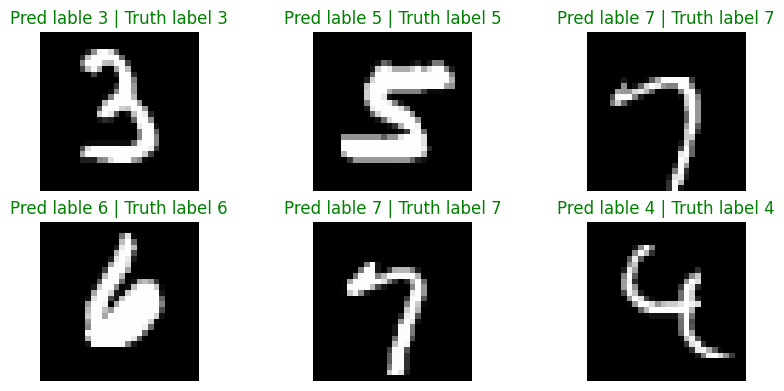

In [ ]:
plt.figure(figsize=(10,7))
nrows, ncols = 3,3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(test_data), size=[1]).item()
  img, label = test_data[random_idx]
  label1 = y_preds_tensor[random_idx].item()
  plt.subplot(nrows, ncols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  if label1 == label:
    plt.title(f"Pred lable {label1} | Truth label {label}", color='green')
  else:
    plt.title(f"Pred lable {label1} | Truth label {label}", color='red')
  plt.axis(False)


6
6 - six


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

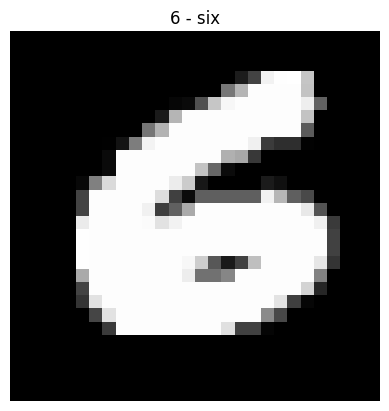

In [ ]:
img, label = train_data[37542]
print(label)
print(train_data.classes[label])
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"{train_data.classes[label]}")
plt.axis(False)

##11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
!pip install -q torchmetrics
import torchmetrics
import mlxtend

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

mlxtend.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00


'0.23.4'

In [ ]:
torchmetrics.__version__
mlxtend.__version__

'0.23.4'

In [ ]:
confmat = ConfusionMatrix(num_classes=10, task="multiclass")
conf_values = confmat(y_preds_tensor, test_data.targets)
conf_values

tensor([[ 973,    0,    1,    0,    0,    0,    1,    1,    4,    0],
        [   0, 1124,    5,    1,    0,    0,    0,    0,    5,    0],
        [   4,    3, 1011,    3,    2,    0,    0,    3,    6,    0],
        [   1,    1,    3,  989,    0,    4,    0,    4,    7,    1],
        [   1,    2,    4,    0,  964,    0,    0,    0,    4,    7],
        [   3,    1,    1,   10,    2,  863,    1,    2,    7,    2],
        [  13,    6,    0,    0,    4,    8,  923,    0,    4,    0],
        [   1,    4,   19,    5,    2,    1,    0,  972,    5,   19],
        [   7,    1,    7,    6,    3,    2,    2,    3,  941,    2],
        [   5,    7,    1,    4,    8,    1,    0,    3,    4,  976]])

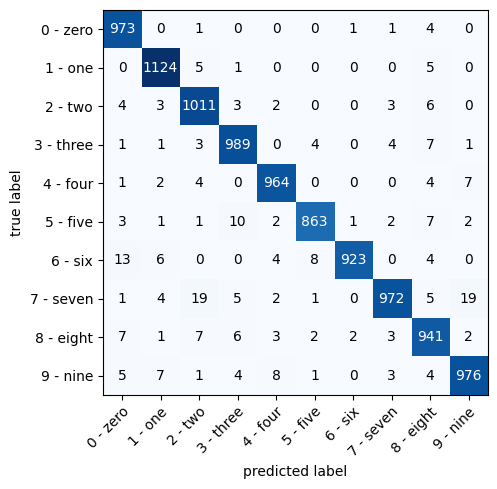

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_values.numpy(),
                                figsize=(10,5),
                                class_names=test_data.classes)

In [ ]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

##12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [ ]:
rand_tensor = torch.randn(size=(1,3,64,64))
conv_layer = nn.Conv2d(in_channels=3,
              out_channels=10,
              kernel_size=(5,5),
              stride=1,
              padding=1)
x = conv_layer(rand_tensor)
print(f"Input tensor shape: {rand_tensor.shape} | Conv layer shape: {x.shape}")

Input tensor shape: torch.Size([1, 3, 64, 64]) | Conv layer shape: torch.Size([1, 10, 62, 62])


In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
print(MODEL_PATH)
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "mnist_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

models
models/mnist_model_v2.pth


In [ ]:
loaded_model_2 = MNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2

MNISTModelV2(
  (conv_blk_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_blk_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

##13. Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_blk_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_blk_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x: torch.Tensor):
    x = self.conv_blk_1(x)
    # print(f"conv block 1:{x.shape}")
    x = self.conv_blk_2(x)
    # print(f"conv block 2:{x.shape}")
    x = self.classifier(x)
    # print(f"classifier:{x.shape}")
    return x

In [ ]:
from torchvision import datasets
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_data = FashionMNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor(),
    target_transform=None
)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

fashionmnist_model2 = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(train_data.classes))

device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=fashionmnist_model2.parameters(),
                            lr=0.01)
fashionmnist_model2.to(device)

train_start_time = timer()

EPOCHS = 3

for epoch in tqdm(range(EPOCHS), desc="Training and Testing..."):
  # Training the model
  fashionmnist_model2.train()
  train_loss = 0
  train_accuracy = 0
  for batch, (X, y) in enumerate(train_data_loader):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = fashionmnist_model2(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backwards
    loss.backward()

    # Optimizer stepup
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_data_loader.dataset)} samples")

  train_loss /= len(train_data_loader)
  train_accuracy /= len(train_data_loader)
  print(f"Epoch: {epoch} | Train_loss {train_loss:.2f} | Train_accuracy: {train_accuracy:.2f}% ")

  # Testing the model
  fashionmnist_model2.eval()
  test_loss, test_accuracy = 0, 0

  with torch.inference_mode():
    for X, y in test_data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = fashionmnist_model2(X)
      test_loss += loss_fn(test_pred, y)
      test_accuracy += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_data_loader)
    test_accuracy /= len(test_data_loader)
    print(f"Epoch: {epoch} | Test_loss: {test_loss:.2f} | Test_accuracy: {test_accuracy:.2f}%")
    if batch == 12:
      print(f"{test_pred}|{test_data.targets}")



train_end_time = timer()
train_total_time = print_train_time(start=train_start_time, end=train_end_time,
                                    device=str(next(model_2.parameters()).device))


torch.manual_seed(42)
torch.cuda.manual_seed(42)
fashionmnist_model2.to(device)
y_preds = []

fashionmnist_model2.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logits = fashionmnist_model2(X)
    pred_probs = torch.softmax(y_logits, dim=1)
    y_pred = torch.argmax(pred_probs, dim=1)
    y_preds.append(y_pred)

y_preds_tensor = torch.cat(y_preds)



# confmat = ConfusionMatrix(num_classes=10, task="multiclass")
# conf_values = confmat(y_preds_tensor, test_data.targets)
# fig, ax = plot_confusion_matrix(conf_mat=conf_values.numpy(),
#                                 class_names=test_data.classes)


Training and Testing...:   0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 0 | Train_loss 1.10 | Train_accuracy: 61.95% 
Epoch: 0 | Test_loss: 0.21 | Test_accuracy: 93.84%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1 | Train_loss 0.16 | Train_accuracy: 95.15% 
Epoch: 1 | Test_loss: 0.11 | Test_accuracy: 96.75%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2 | Train_loss 0.11 | Train_accuracy: 96.77% 
Epoch: 2 | Test_loss: 0.08 | Test_accuracy: 97.59%
Train time on cpu: 169.408217


In [ ]:
print(y_preds_tensor[1070:1081], test_data.targets[1070:1081])

tensor([9, 8, 0, 8, 8, 8, 9, 8, 2, 2, 8]) tensor([1, 6, 5, 1, 4, 4, 8, 4, 7, 7, 3])


In [ ]:
a = torch.tensor((1., 2, 3))
b = torch.tensor((1 + 1e-10, 3, 4))
if not torch.all(torch.isclose(a, b)):
  print(a)

tensor([1., 2., 3.])


In [ ]:
conf_values

tensor([[  3,   1,  12,  15,   3,   3,   1,   3, 956,   3],
        [  0,   2,   9,   1,   8,   0,   0,  11, 886,  83],
        [ 24,   2, 126,   4,   1,   0,  51,   1, 782,   9],
        [  0,   5,  17,   6,   1,   4,   3,   1, 962,   1],
        [  4,   1, 117,   1,   3,   1,  27,   1, 840,   5],
        [ 55,   5, 655,  36,  39, 159,   1,   3,  47,   0],
        [  9,   0,  64,   7,   5,   0,   4,   1, 907,   3],
        [ 23,   0, 880,   0,  81,   1,   2,   0,  13,   0],
        [290,   2, 315,   2,  10,  24,   1,   2, 354,   0],
        [ 31, 106, 613,  55,   2,   8,   0,   1, 184,   0]])

In [ ]:
print(conf_values[[1]])
conf_values_numpy = conf_values[[1]].numpy()
print(conf_values_numpy[0,1])

tensor([[  0,   2,   9,   1,   8,   0,   0,  11, 886,  83]])
2


In [ ]:
# Prepare the test samples for visualization

import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=6):
  test_samples.append(sample)
  test_labels.append(label)



In [ ]:
len(test_samples)

6

In [ ]:
class_names = test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
loaded_model_2.eval()
pred_probs = []
with torch.inference_mode():
  for sample in test_samples:
    sample = torch.unsqueeze(sample, dim=0)
    y_logits = loaded_model_2(sample)
    pred_prob = torch.softmax(y_logits.squeeze(), dim=0)
    pred_labels = pred_prob.argmax(dim=1)
    pred_probs.append(pred_labels)
pred_probs_tensor = torch.cat(pred_probs)
pred_probs_tensor

In [ ]:
test_samples.
samples = torch.cat(test_samples, test_labels)
samples.shape

TypeError: cat() received an invalid combination of arguments - got (list, list), but expected one of:
 * (tuple of Tensors tensors, int dim = 0, *, Tensor out = None)
 * (tuple of Tensors tensors, name dim, *, Tensor out = None)


IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

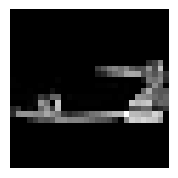

In [ ]:
nrows, ncols = 3,3
fig = plt.figure(figsize=(10,7))
for i,sample in enumerate(test_samples):
  fig.add_subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  plt.axis(False)
  title_text=f"Pred: {class_names[pred_labels[i]]} | Truth: {class_names[test_labels[i]]}"
  if class_names[pred_labels[i]] == class_names[test_labels[i]]:
    plt.title(title_text, fontsize=10, color="green")
  else:
    plt.title(title_text, fontsize=10, color="red")
